# EDA

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt
import matplotlib
#set a standard size for figures
matplotlib.rcParams['figure.figsize'] = (14, 8)

In [23]:
#sets the default options for viewing pandas dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [24]:
path = '/Users/dmitriykats/Documents/SpringBoard/Springboard/Capstone2/true_review/data/'

In [25]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

In [26]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [27]:
df = df.drop(columns='bus_id')

In [28]:
#create a weekday column 
df['weekday'] = df.date.apply(lambda x: x.weekday())

In [29]:
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)

In [30]:
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066833 entries, 0 to 3066832
Data columns (total 23 columns):
user_id         object
business_id     object
rev_stars       int64
date            datetime64[ns]
text            object
useful          int64
funny           int64
cool            int64
name            object
neighborhood    object
address         object
city            object
state           object
postal_code     object
latitude        float64
longitude       float64
bus_stars       float64
review_count    int64
is_open         int64
categories      object
weekday         int64
text length     int64
year            int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(10)
memory usage: 538.2+ MB


In [77]:
df.isnull().sum()

user_id               0
business_id           0
rev_stars             0
date                  0
text                  0
useful                0
funny                 0
cool                  0
name                  0
neighborhood    1461574
address               0
city                  0
state                 0
postal_code        1054
latitude              0
longitude             0
bus_stars             0
review_count          0
is_open               0
categories            0
weekday               0
text length           0
year                  0
dtype: int64

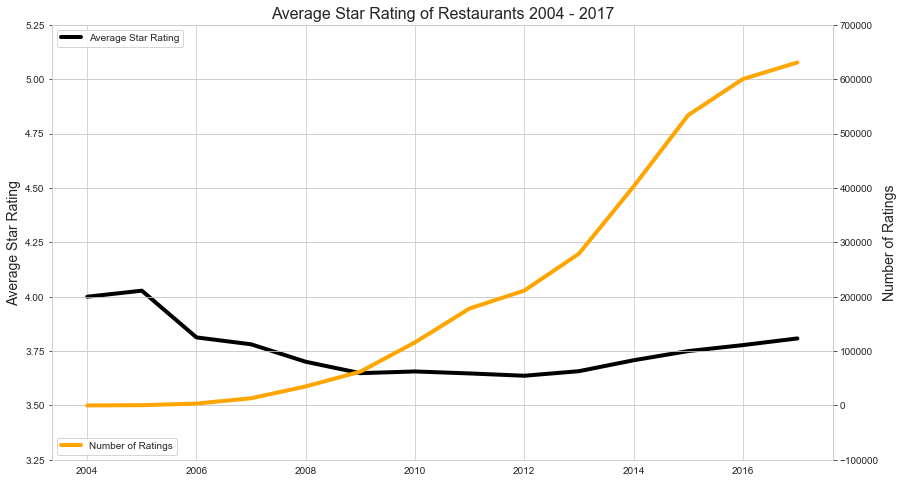

In [31]:
matplotlib.rcParams['figure.figsize'] = (14, 8)

x1 = df.groupby(['year'])['rev_stars'].mean().keys()
x2 =  df.groupby(['year'])['rev_stars'].count().keys()

y1 = df.groupby(['year'])['rev_stars'].mean().values
y2 = df.groupby(['year'])['rev_stars'].count().values

ax = plt.subplot(111)
ax.plot(x1, y1, color='black', linewidth=4)
plt.legend(['Average Star Rating'], loc='upper left')
plt.ylim(3.25, 5.25)
plt.ylabel('Average Star Rating', fontsize=14)

ax2 = ax.twinx()
ax2.plot(x2, y2, color='orange', linewidth=4)
plt.legend(['Number of Ratings'], loc='lower left')
plt.ylim(-100000, 700_000)
plt.ylabel('Number of Ratings', fontsize=14)

plt.title('Average Star Rating of Restaurants 2004 - 2017', fontsize=16)
plt.show()

In [32]:
ave_reviews = pd.DataFrame(df.groupby(['year','business_id'])['rev_stars'].mean()).reset_index()

In [33]:
ave_reviews.head()

year             business_id  rev_stars
0  2004  9X-43jnj6-6ZBuBdFm7BLA        2.0
1  2004  AtLv64FV-Pw6JuT3XUKU1g        4.0
2  2004  N2PlDjUJVfOJzsPzY0Au1w        3.0
3  2004  PD2MAlYYi9HCqPH7IBKwTg        5.0
4  2004  oYMsq2Xvzw6UbrIlMWjb-A        4.0

Text(0.5, 0, 'Year')

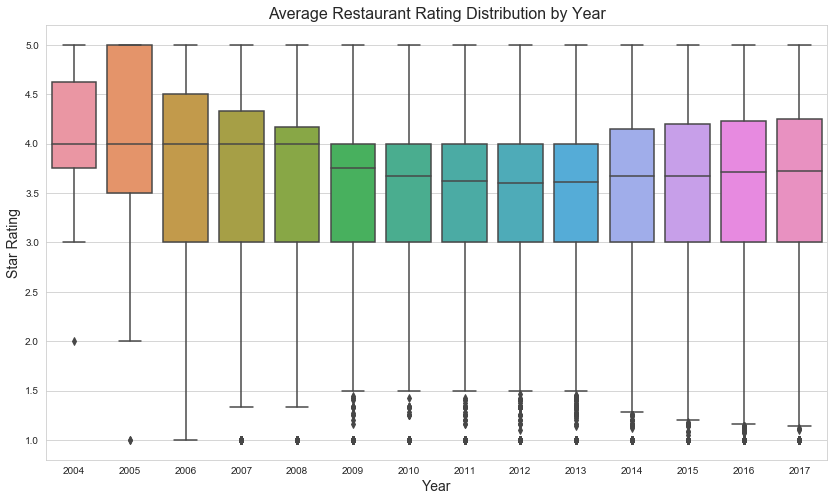

In [34]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.boxplot(x='year', y='rev_stars', data=ave_reviews)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)

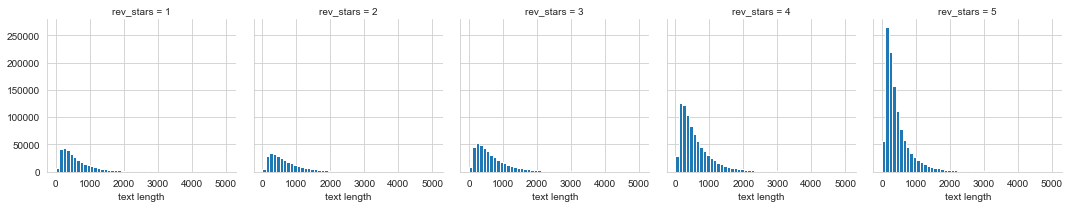

In [35]:
#distribution of reviews for each star rating
g = sns.FacetGrid(data=df, col='rev_stars')
g.map(plt.hist, 'text length', bins=50)

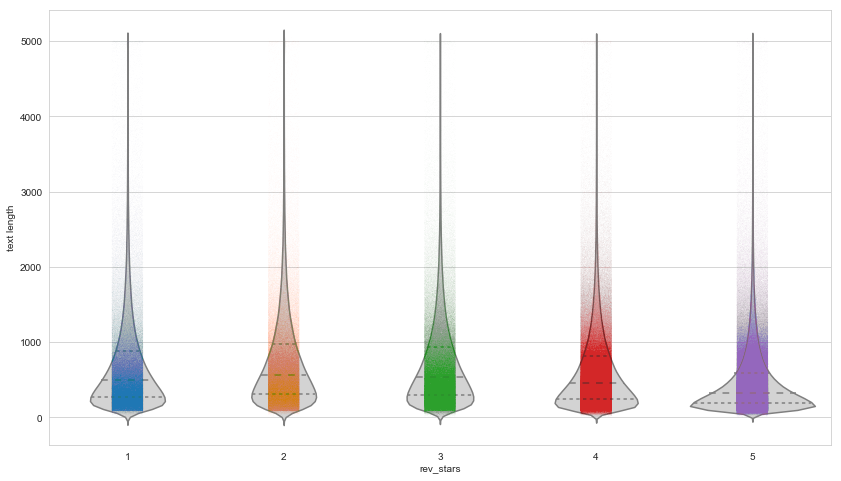

In [36]:
# Overlay a strip plot on the violin plot

matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.stripplot(x='rev_stars', y='text length', data=df, jitter=1, size=0.2, alpha=0.2)

sns.violinplot(x='rev_stars', y='text length', data=df, inner='quartile', color='lightgray')

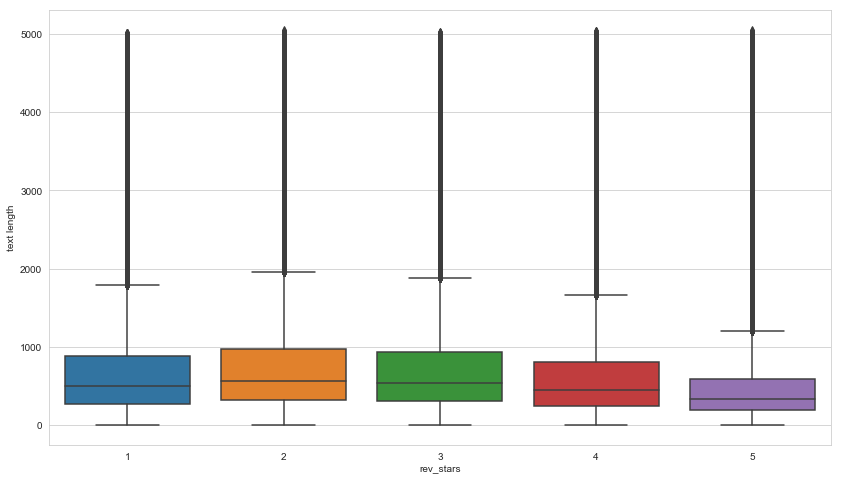

In [37]:
#box plots for number of characters in a given review by star rating
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.boxplot(x='rev_stars', y='text length', data=df)

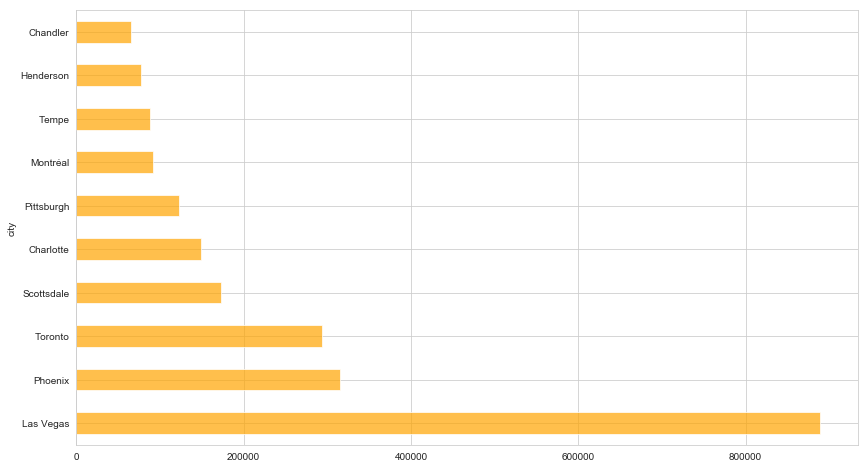

In [38]:
#which city has the most reviews?
matplotlib.rcParams['figure.figsize'] = (14, 8)
df.groupby(['city']).size().sort_values(ascending=False)[0:10].plot(kind='barh', color='orange', alpha=0.7)

## Looking at Restaurant Categories

In [40]:
categories = pd.DataFrame(df.groupby(['business_id','categories','bus_stars']).size())

In [41]:
categories = categories.reset_index()

In [42]:
categories.head(3)

business_id                            categories  bus_stars  \
0  --6MefnULPED_I942VcFNA                   Chinese;Restaurants        3.0   
1  --9e1ONYQuAa-CB_Rrw7Tw  Cajun/Creole;Steakhouses;Restaurants        4.0   
2  --DaPTJW3-tB1vP-PfdTEg        Restaurants;Breakfast & Brunch        3.5   

      0  
0    37  
1  1451  
2    39

In [43]:
cat_split = categories['categories'].str.split(';', expand=True)

In [44]:
#remove irrelevant categories: Restaurant, Nightlife, Food
cat_split = cat_split.replace(to_replace=['Restaurants','Nightlife','Food'], value=np.nan)

Text(0.5, 1.0, 'Most Common Restaurant Categories')

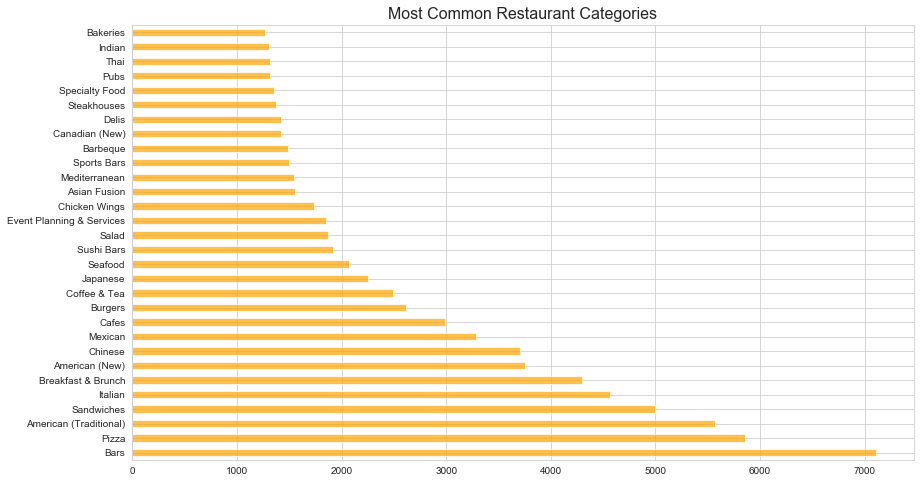

In [45]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
cat_split.stack().value_counts(ascending=False)[0:30].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Most Common Restaurant Categories', fontsize=16)

In [46]:
#Let's see what the average rating is for a few categories: Pizza, Japanese, Mediterranean, Chinese, Mexican
indian = df[df['categories'].str.contains('Indian')]
japanese = df[df['categories'].str.contains('Japanese')]
med = df[df['categories'].str.contains('Mediterranean')]
chinese = df[df['categories'].str.contains('Chinese')]
mexican = df[df['categories'].str.contains('Mexican')]

## Picking a few restaurants for deep analysis

In [47]:
df.groupby(['business_id','name','city','rev_stars']).size().sort_values(ascending=False).head(10)

business_id             name                        city       rev_stars
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  5            3280
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  5            2725
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  4            2576
DkYS3arLOhA8si5uUEmHOw  "Earl of Sandwich"          Las Vegas  5            2443
hihud--QRriCYZw1zZvW4g  "Gangnam Asian BBQ Dining"  Las Vegas  5            2280
cYwJA2A6I12KNkm2rtXd5g  "Gordon Ramsay BurGR"       Las Vegas  5            2198
KskYqH1Bi7Z_61pH6Om8pg  "Lotus of Siam"             Las Vegas  5            2162
K7lWdNUhCbcnEvI0NhGewg  "Wicked Spoon"              Las Vegas  4            1913
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  4            1899
f4x1YBxkLrZg652xt2KR5g  "Hash House A Go Go"        Las Vegas  5            1888
dtype: int64

In [48]:
df.groupby(['user_id'])['useful'].sum().sort_values(ascending=False)[0:10]

user_id
bLbSNkLggFnqwNNzzq-Ijw    15557
zFYs8gSUYDvXkb6O7YkRkw    11515
8DEyKVyplnOcSKx39vatbg    11098
Fv0e9RIV9jw5TX3ctA1WbA     9934
DK57YibC5ShBmqQl97CKog     7424
PKEzKWv_FktMm2mGPjwd0Q     7322
CxDOIDnH8gp9KXzpBHJYXw     6872
M9rRM6Eo5YbKLKMG5QiIPA     6837
rCWrxuRC8_pfagpchtHp6A     6375
qewG3X2O4X6JKskxyyqFwQ     6277
Name: useful, dtype: int64

In [49]:
gordon = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 5)]

In [50]:
gordon_all = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [51]:
gordon_all = gordon_all[['date','user_id','rev_stars','useful','funny','cool','text length']]

In [52]:
gordon_all.head()

date                 user_id  rev_stars  useful  funny  cool  \
172674 2013-08-18  0YBJMg4H0SGqYZbZTxnSOg          4       0      0     0   
172822 2015-10-23  D9FTLv0yW469_OrVMH4t-Q          5       0      0     1   
172854 2014-02-17  ltf9Hx604T5OjJ2jJ44BBg          1       1      0     0   
172897 2016-05-11  FsUSrlL2-W3XsxmOctc9YA          3       1      1     2   
172961 2017-01-02  Ws70fVeBQnHOFJ-xzJoMnQ          1       0      2     0   

        text length  
172674          958  
172822           86  
172854          383  
172897          471  
172961          411

In [53]:
gordon_all = gordon_all.sort_index()

([], <a list of 0 Text xticklabel objects>)

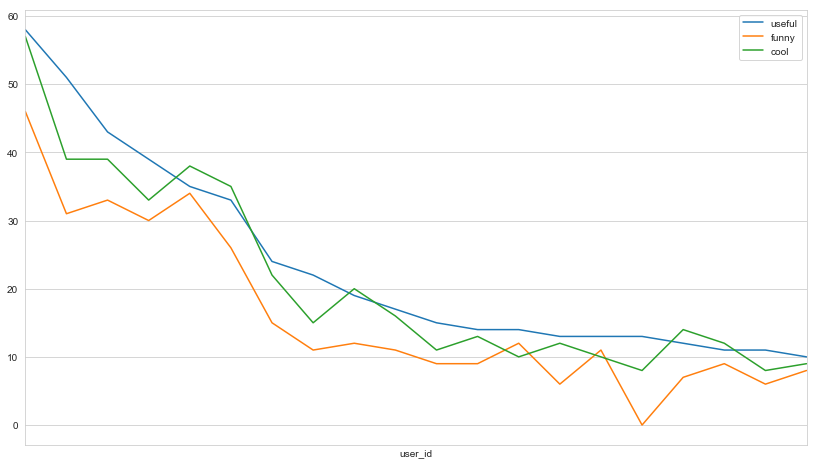

In [54]:
gordon.groupby('user_id')['useful','funny','cool'].sum().sort_values(by='useful', ascending=False)[0:20].plot()
matplotlib.rcParams['figure.figsize'] = (6, 8)
plt.xticks([])

In [55]:
#let's sort by useful reviews with a lot of words
gordon.sort_values(by=['useful','text length'], ascending=False)

user_id             business_id  rev_stars       date  \
834408   m9lvZzJBlfFMQz97CyWfuw  cYwJA2A6I12KNkm2rtXd5g          5 2016-03-02   
2996564  Gppf1W0Bk9olxs1vplhmUg  cYwJA2A6I12KNkm2rtXd5g          5 2014-11-02   
228137   393M4uM_4GBLPbhQIQtF9g  cYwJA2A6I12KNkm2rtXd5g          5 2016-02-29   
1772075  Wd4FRRD30avk-Mj6C_O2ow  cYwJA2A6I12KNkm2rtXd5g          5 2014-01-14   
1127244  WGBpuJBQ1FqRTxM8J5BBHg  cYwJA2A6I12KNkm2rtXd5g          5 2015-04-21   
1455227  cnN6RMKuQiUte7ekcYnK5g  cYwJA2A6I12KNkm2rtXd5g          5 2016-06-21   
259869   Nci8Nx0_9G0MSLYvQifacQ  cYwJA2A6I12KNkm2rtXd5g          5 2015-06-28   
552735   CY9iLsE2z_yLhLqJdD1WGw  cYwJA2A6I12KNkm2rtXd5g          5 2013-04-12   
1731549  ZIOCmdFaMIF56FR-nWr_2A  cYwJA2A6I12KNkm2rtXd5g          5 2014-02-07   
2990398  wwmJ56OlvMC_Z8llXTd6mA  cYwJA2A6I12KNkm2rtXd5g          5 2014-09-16   
802866   juJS5_I5IGzMveRKNBwEVA  cYwJA2A6I12KNkm2rtXd5g          5 2017-01-27   
2657897  6FfAd6b7URbFunVWS44EwA  cYwJA2A6I12KNkm2rtXd5g          5 2014-08-05   
2685231  a-Ug_MFryz3utca-NaMkNQ  cYwJA2A6I12KNkm2rtXd5g          5 2015-08-18   
2382579  8drMKNHWavs2g6uf0pLtvg  cYwJA2A6I12KNkm2rtXd5g          5 2016-02-22   
2367431  s2o_JsABvrZVm_T03qrBUw  cYwJA2A6I12KNkm2rtXd5g          5 2014-02-04   
2656948  WC2vra21_G9eORjwFq41pQ  cYwJA2A6I12KNkm2rtXd5g          5 2013-12-29   
2405670  YlnOzp45KWr1-VGN1WIJoA  cYwJA2A6I12KNkm2rtXd5g          5 2015-06-04   
798586   Gjv3ERasrRJqtEPa7ZMUSw  cYwJA2A6I12KNkm2rtXd5g          5 2014-09-27   
485442   Db80SCez0BdYaHdC0xmzoQ  cYwJA2A6I12KNkm2rtXd5g          5 2014-07-11   
1168733  LmNFdXUD6NPBiUZQpnwfUg  cYwJA2A6I12KNkm2rtXd5g          5 2015-07-13   
2626562  dqo-o6O847KTF3NDADxxDg  cYwJA2A6I12KNkm2rtXd5g          5 2014-06-12   
1488797  KgbTukJRGvtoNmPICKlO1w  cYwJA2A6I12KNkm2rtXd5g          5 2015-11-07   
2697145  o2Or6xqxeWaE46tdzK0UGg  cYwJA2A6I12KNkm2rtXd5g          5 2013-09-10   
2071302  4UwWb_WBziRCjzZli04x6g  cYwJA2A6I12KNkm2rtXd5g          5 2015-11-28   
553618   Ry4Qxi__pgkvL2Dqdlolww  cYwJA2A6I12KNkm2rtXd5g          5 2014-02-25   
...                         ...                     ...        ...        ...   
2021820  2HPAOqz_79xTD1GgS2SGyw  cYwJA2A6I12KNkm2rtXd5g          5 2013-06-21   
2332213  lcvVV_3x0Rvrwvleo-fBjg  cYwJA2A6I12KNkm2rtXd5g          5 2016-11-05   
3011433  Yi0qdlqVlyK-cgM-JOQK5Q  cYwJA2A6I12KNkm2rtXd5g          5 2016-03-20   
482223   LQd0tfhBL10sVI-eO29_2g  cYwJA2A6I12KNkm2rtXd5g          5 2016-12-28   
1121819  cXOZf3mDojR62IUAyuvA_w  cYwJA2A6I12KNkm2rtXd5g          5 2015-10-26   
1458800  kp3_WMtnCjf-3nIzTy8oDw  cYwJA2A6I12KNkm2rtXd5g          5 2015-07-16   
1720939  JqEHyGNJRROQyhKPKHsrFg  cYwJA2A6I12KNkm2rtXd5g          5 2016-03-22   
172822   D9FTLv0yW469_OrVMH4t-Q  cYwJA2A6I12KNkm2rtXd5g          5 2015-10-23   
542497   SGJFMDPqqu6w_eGSWLTMJg  cYwJA2A6I12KNkm2rtXd5g          5 2014-12-23   
1784988  ZHm1f5VLWFAqHxLH0w3KqA  cYwJA2A6I12KNkm2rtXd5g          5 2014-05-26   
1130905  -wLUF7zfDPLQPLG_vVwd-A  cYwJA2A6I12KNkm2rtXd5g          5 2013-07-02   
1749119  tReyUA6BExyeNKnpYCXrdg  cYwJA2A6I12KNkm2rtXd5g          5 2016-09-02   
2026787  3qJrOglavPlqChUG0VvLNg  cYwJA2A6I12KNkm2rtXd5g          5 2015-06-06   
2658117  xStyVK5pcSQdmrRDjKKieQ  cYwJA2A6I12KNkm2rtXd5g          5 2013-06-04   
1097340  UX8S_oo3vaX33pqPuq3Nbg  cYwJA2A6I12KNkm2rtXd5g          5 2013-07-22   
1120125  C-ZVhDiMnmmS3FrBI5iptg  cYwJA2A6I12KNkm2rtXd5g          5 2017-12-09   
2944844  Big6v3kgoqVixTnz8cFSlw  cYwJA2A6I12KNkm2rtXd5g          5 2014-06-02   
2098597  iGvfewV31hMAZevE10lO5w  cYwJA2A6I12KNkm2rtXd5g          5 2014-12-30   
1406028  OdhUSNW6TIeYw9rIM1CDUA  cYwJA2A6I12KNkm2rtXd5g          5 2016-03-01   
1483568  fpjGizBWjIPNqXQ6J1dwqw  cYwJA2A6I12KNkm2rtXd5g          5 2013-03-16   
1716085  NZgtbPzXIYG2UveRkv2I_A  cYwJA2A6I12KNkm2rtXd5g          5 2013-10-16   
2956867  DnMNvCYPnqzoXQh8oW5RyA  cYwJA2A6I12KNkm2rtXd5g          5 2013-04-27   
2958784  lc1wSn-TQPPmLsAbjFW7Ww  cYwJA2A6I12KNkm2rtXd5g

In [56]:
#taking a look at a useful review with a lot of words
gordon.loc[2996564]

user_id                                    Gppf1W0Bk9olxs1vplhmUg
business_id                                cYwJA2A6I12KNkm2rtXd5g
rev_stars                                                       5
date                                          2014-11-02 00:00:00
text            Being an avid burger lover who is always in se...
useful                                                         51
funny                                                          31
cool                                                           39
name                                        "Gordon Ramsay BurGR"
neighborhood                                            The Strip
address                                   "3667 Las Vegas Blvd S"
city                                                    Las Vegas
state                                                          NV
postal_code                                                 89109
latitude                                                  36.1107
longitude 

### Looking at Checkins

In [57]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')

In [58]:
df_check.head()

business_id weekday   hour  checkins
0  3Mc-LxcqeguOXOVT_2ZtCg     Tue   0:00        12
1  SVFx6_epO22bZTZnKwlX7g     Wed   0:00         4
2  vW9aLivd4-IorAfStzsHww     Tue  14:00         1
3  tEzxhauTQddACyqdJ0OPEQ     Fri  19:00         1
4  CEyZU32P-vtMhgqRCaXzMA     Tue  17:00         1

In [59]:
gordon_checkin = df_check[(df_check.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [60]:
gordon_checkin['weekday'] = pd.Categorical(gordon_checkin['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
gordon_checkin.head()

business_id weekday   hour  checkins
25162   cYwJA2A6I12KNkm2rtXd5g     Thu   3:00       131
63515   cYwJA2A6I12KNkm2rtXd5g     Mon  16:00         7
66894   cYwJA2A6I12KNkm2rtXd5g     Sat  18:00       173
115057  cYwJA2A6I12KNkm2rtXd5g     Wed  13:00         1
117984  cYwJA2A6I12KNkm2rtXd5g     Tue   4:00       116

In [62]:
checkin_by_day = gordon_checkin.groupby(['weekday','hour']).sum()

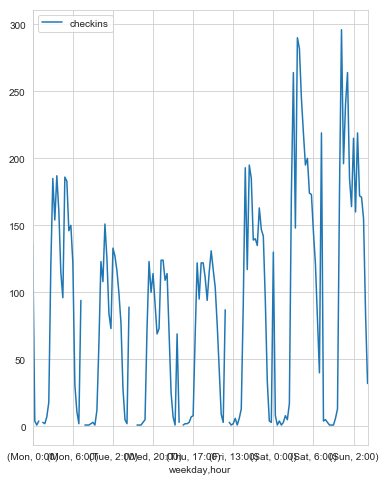

In [63]:
checkin_by_day.plot()

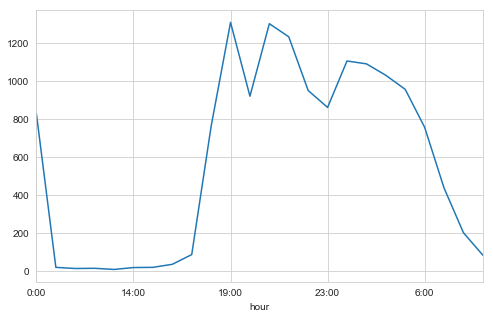

In [64]:
matplotlib.rcParams['figure.figsize'] = (8, 5)
gordon_checkin.groupby(['hour'])['checkins'].sum().plot()

Text(0, 0.5, 'Number of Checkins')

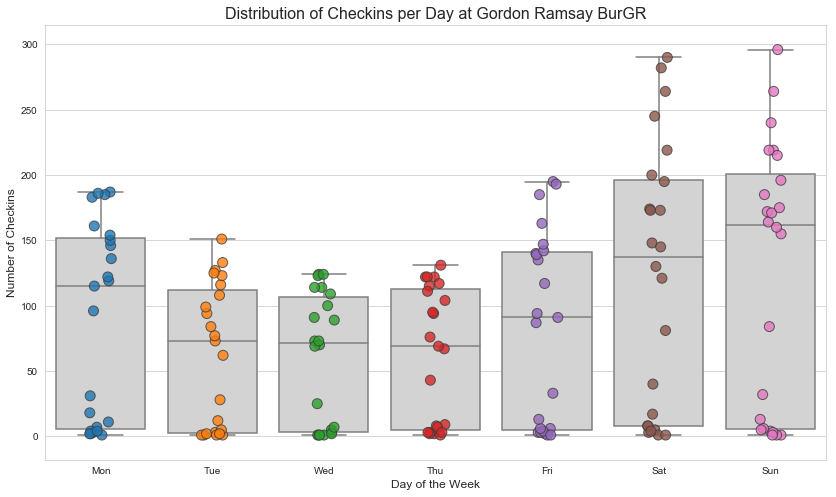

In [65]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.boxplot(x='weekday', y='checkins', data=gordon_checkin, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=gordon_checkin, alpha=0.8, jitter=True, size=10, linewidth=1)
plt.title('Distribution of Checkins per Day at Gordon Ramsay BurGR', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)

In [66]:
vegas = list(df[(df.city == "Las Vegas") & (df.neighborhood == 'The Strip') & (df.rev_stars == 5)].business_id)

In [67]:
vegas_checkins = df_check[df_check.business_id.isin(vegas)]

In [68]:
vegas_checkins['weekday'] = pd.Categorical(vegas_checkins['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(-10, 140)

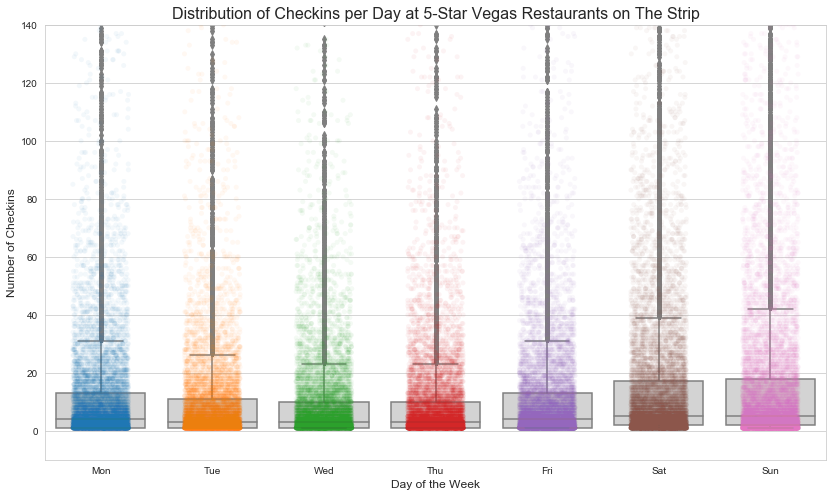

In [69]:
#how do all other restaurants on The Strip in Las Vegas compare?
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.boxplot(x='weekday', y='checkins', data=vegas_checkins, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=vegas_checkins, alpha=0.05, jitter=.25, size=5)
plt.title('Distribution of Checkins per Day at 5-Star Vegas Restaurants on The Strip', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)
plt.ylim(-10, 140)

### Timeseries

In [79]:
gordon_all['year'] = gordon_all.date.apply(lambda x: x.year)

In [80]:
gordon_all.head()

date                 user_id  rev_stars  useful  funny  cool  \
172674 2013-08-18  0YBJMg4H0SGqYZbZTxnSOg          4       0      0     0   
172822 2015-10-23  D9FTLv0yW469_OrVMH4t-Q          5       0      0     1   
172854 2014-02-17  ltf9Hx604T5OjJ2jJ44BBg          1       1      0     0   
172897 2016-05-11  FsUSrlL2-W3XsxmOctc9YA          3       1      1     2   
172961 2017-01-02  Ws70fVeBQnHOFJ-xzJoMnQ          1       0      2     0   

        text length  week  year  
172674          958    33  2013  
172822           86    43  2015  
172854          383     8  2014  
172897          471    19  2016  
172961          411     1  2017

In [72]:
gordon_all['week'] = gordon_all.date.apply(lambda x: x.week)

In [81]:
gordon_all.head()

date                 user_id  rev_stars  useful  funny  cool  \
172674 2013-08-18  0YBJMg4H0SGqYZbZTxnSOg          4       0      0     0   
172822 2015-10-23  D9FTLv0yW469_OrVMH4t-Q          5       0      0     1   
172854 2014-02-17  ltf9Hx604T5OjJ2jJ44BBg          1       1      0     0   
172897 2016-05-11  FsUSrlL2-W3XsxmOctc9YA          3       1      1     2   
172961 2017-01-02  Ws70fVeBQnHOFJ-xzJoMnQ          1       0      2     0   

        text length  week  year  
172674          958    33  2013  
172822           86    43  2015  
172854          383     8  2014  
172897          471    19  2016  
172961          411     1  2017

In [82]:
reviews = pd.DataFrame(gordon_all.groupby(['year', 'week', 'rev_stars']).size()).reset_index()

In [85]:
reviews.head(10)

year  week  rev_stars  0
0  2012     1          1  4
1  2012    51          5  1
2  2012    52          1  1
3  2012    52          2  1
4  2012    52          4  4
5  2012    52          5  5
6  2013     1          1  1
7  2013     1          3  2
8  2013     1          4  7
9  2013     1          5  8

In [137]:
reviews_good = reviews[(reviews.rev_stars >= 4) & (reviews.year == 2015)]

In [138]:
reviews_good.head()

year  week  rev_stars   0
469  2015     1          4   6
470  2015     1          5   8
474  2015     2          4  10
475  2015     2          5  10
479  2015     3          4   6

Text(0.5, 0, 'Week of Year')

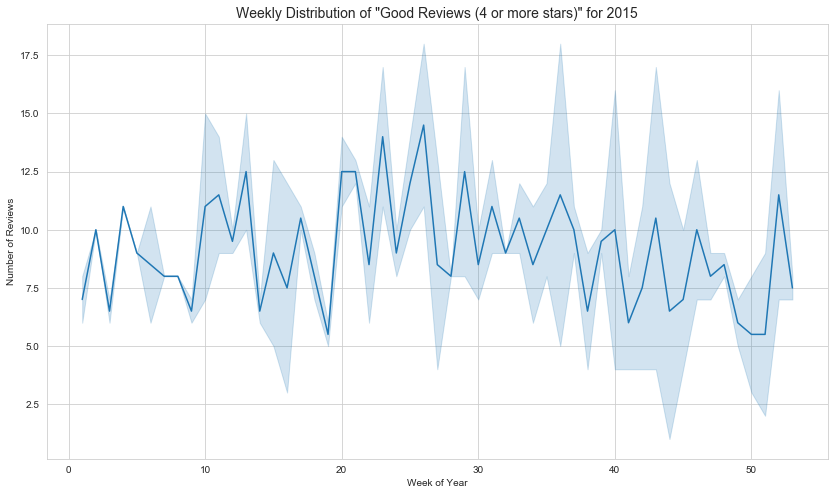

In [141]:
sns.lineplot(x='week', y=0, data=reviews_good)

plt.title('Weekly Distribution of "Good Reviews (4 or more stars)" for 2015', fontsize=14)
plt.ylabel('Number of Reviews')
plt.xlabel('Week of Year')

In [104]:
gordon_all['weekday'] = gordon_all.date.apply(lambda x: x.weekday())

(1, 5)

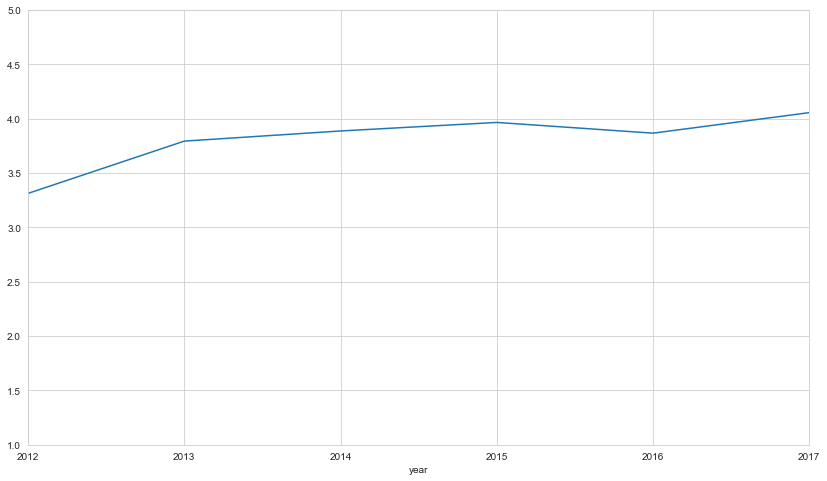

In [105]:
gordon_all.groupby(['year'])['rev_stars'].mean().plot()
plt.ylim(1,5)

Text(0.5, 1.0, 'Distribution Star Ratings Over the Years for Gordon Ramsay BurGR')

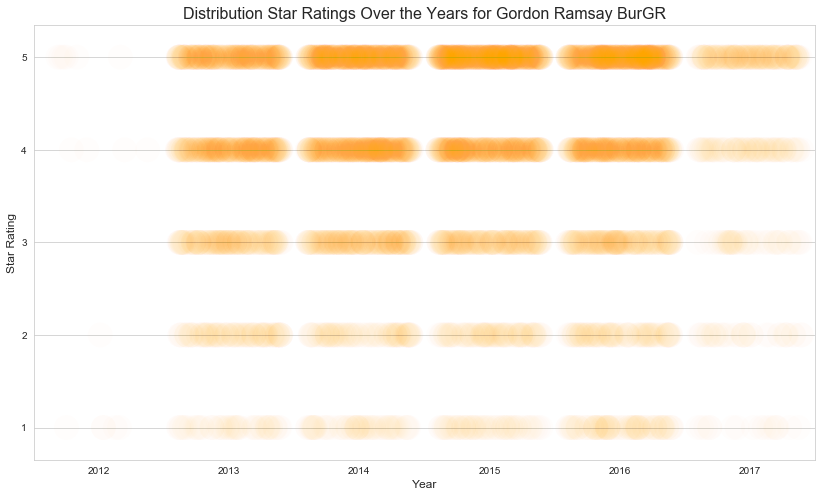

In [106]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.stripplot(x='year', y='rev_stars', data=gordon_all, alpha=0.01, 
              jitter=0.4, size=25, color='orange')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)

plt.title('Distribution Star Ratings Over the Years for Gordon Ramsay BurGR', fontsize=16)

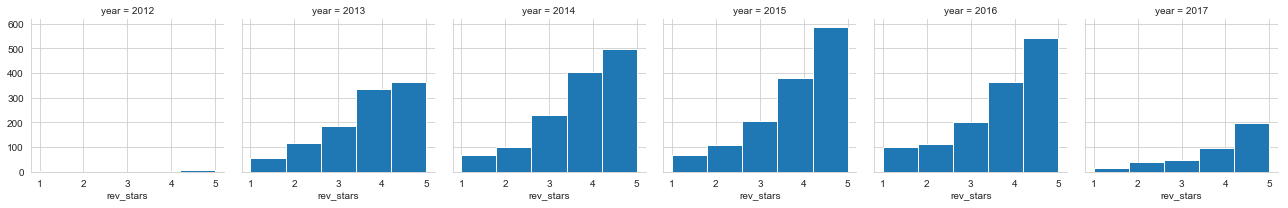

In [107]:
g = sns.FacetGrid(data=gordon_all, col='year')
g.map(plt.hist, 'rev_stars', bins=5)

### Users and their friends

In [108]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])

In [109]:
df_friends.head()

user_id    name  review_count yelping_since  \
0  JJ-aSuM4pCFPdkfoZ34q0Q   Chris            10    2013-09-24   
1  uUzsFQn_6cXDh6rPNGbIFA   Tiffy             1    2017-03-02   
2  mBneaEEH5EMyxaVyqS-72A    Mark             6    2015-03-13   
3  W5mJGs-dcDWRGEhAzUYtoA  Evelyn             3    2016-09-08   
4  4E8--zUZO1Rr1IBK4_83fg    Lisa            11    2012-07-16   

                                             friends  useful  funny  cool  \
0  0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...       0      0     0   
1                                               None       0      0     0   
2                                               None       0      0     0   
3                                               None       0      0     0   
4                                               None       4      0     0   

   fans elite  average_stars  compliment_hot  compliment_more  \
0     0  None           3.70               0                0   
1     0  None           2.00               0                0   
2     0  None           4.67               0                0   
3     0  None           4.67               0                0   
4     0  None           3.45               0                0   

   compliment_profile  compliment_cute  compliment_list  compliment_note  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
0                 0                0                 0                  0   
1                 0                0                 0                  0   
2                 0                0                 0                  0   
3                 0                0                 0                  0   
4                 0                0                 0                  1   

   compliment_photos  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [110]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null datetime64[ns]
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny 

In [111]:
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)

In [112]:
df_friends = df_friends.dropna()

In [113]:
df_friends.head()

user_id      name  review_count yelping_since  \
0   JJ-aSuM4pCFPdkfoZ34q0Q     Chris            10    2013-09-24   
17  h5ERTYn2vQ1QbjTZvfWPaA     Bobby             3    2017-01-07   
18  jYnkJR3T8yCERXywoVhWYA      Hugo            48    2010-07-06   
44  fV8Yr0c5tFQTQ2SRRJHXHw  Michelle            50    2007-08-22   
74  aw973Pm1nrTbRjP4zY9B9g     Kenny           762    2008-09-23   

                                              friends  useful  funny  cool  \
0   0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...       0      0     0   
17  jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...       0      0     0   
18  hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...      15      6     2   
44  HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...      43     12     5   
74  Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...     174    151    67   

    fans                                     elite  average_stars  \
0      0                                      None           3.70   
17     0                                      None           3.33   
18     3                                      None           3.73   
44     1                                      2009           3.96   
74    27  2014, 2016, 2013, 2015, 2010, 2012, 2011           3.60   

    compliment_hot  compliment_more  compliment_profile  compliment_cute  \
0                0                0                   0                0   
17               0                0                   0                0   
18               2                0                   0                0   
44               2                4                   0                0   
74              20                4                   2                7   

    compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                 0                0                 0                0   
17                0                0                 0                0   
18                0                1                 1                1   
44                0                9                 7                7   
74                0               16                52               47   

    compliment_funny  compliment_writer  compliment_photos  
0                  0                  0                  0  
17                 0                  0                  0  
18                 1                  2                  0  
44                 7                  4                  0  
74                47                 14                  1

In [114]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759790 entries, 0 to 1320280
Data columns (total 22 columns):
user_id               759790 non-null object
name                  759790 non-null object
review_count          759790 non-null int64
yelping_since         759790 non-null datetime64[ns]
friends               759790 non-null object
useful                759790 non-null int64
funny                 759790 non-null int64
cool                  759790 non-null int64
fans                  759790 non-null int64
elite                 759790 non-null object
average_stars         759790 non-null float64
compliment_hot        759790 non-null int64
compliment_more       759790 non-null int64
compliment_profile    759790 non-null int64
compliment_cute       759790 non-null int64
compliment_list       759790 non-null int64
compliment_note       759790 non-null int64
compliment_plain      759790 non-null int64
compliment_cool       759790 non-null int64
compliment_funny      759790 non-null

In [115]:
df_friends['num_friends'] = df_friends.friends.apply(lambda x: x.count(',') + 1)

In [116]:
df_friends['year'] = df_friends.yelping_since.apply(lambda x: x.year)

In [117]:
df_friends.head()

user_id      name  review_count yelping_since  \
0   JJ-aSuM4pCFPdkfoZ34q0Q     Chris            10    2013-09-24   
17  h5ERTYn2vQ1QbjTZvfWPaA     Bobby             3    2017-01-07   
18  jYnkJR3T8yCERXywoVhWYA      Hugo            48    2010-07-06   
44  fV8Yr0c5tFQTQ2SRRJHXHw  Michelle            50    2007-08-22   
74  aw973Pm1nrTbRjP4zY9B9g     Kenny           762    2008-09-23   

                                              friends  useful  funny  cool  \
0   0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...       0      0     0   
17  jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...       0      0     0   
18  hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...      15      6     2   
44  HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...      43     12     5   
74  Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...     174    151    67   

    fans                                     elite  average_stars  \
0      0                                      None           3.70   
17     0                                      None           3.33   
18     3                                      None           3.73   
44     1                                      2009           3.96   
74    27  2014, 2016, 2013, 2015, 2010, 2012, 2011           3.60   

    compliment_hot  compliment_more  compliment_profile  compliment_cute  \
0                0                0                   0                0   
17               0                0                   0                0   
18               2                0                   0                0   
44               2                4                   0                0   
74              20                4                   2                7   

    compliment_list  compliment_note  compliment_plain  compliment_cool  \
0                 0                0                 0                0   
17                0                0                 0                0   
18                0                1                 1                1   
44                0                9                 7                7   
74                0               16                52               47   

    compliment_funny  compliment_writer  compliment_photos  num_friends  year  
0                  0                  0                  0           79  2013  
17                 0                  0                  0           64  2017  
18                 1                  2                  0          263  2010  
44                 7                  4                  0          100  2007  
74                47                 14                  1          332  2008

In [118]:
df_friends.drop(df_friends[df_friends.review_count < 10].index, inplace=True)

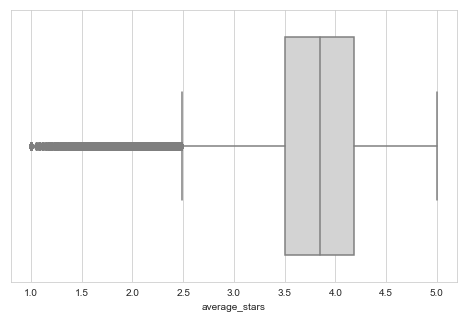

In [119]:
matplotlib.rcParams['figure.figsize'] = (8, 5)
sns.boxplot(x='average_stars', data=df_friends, color='lightgray')

(-100, 7000)

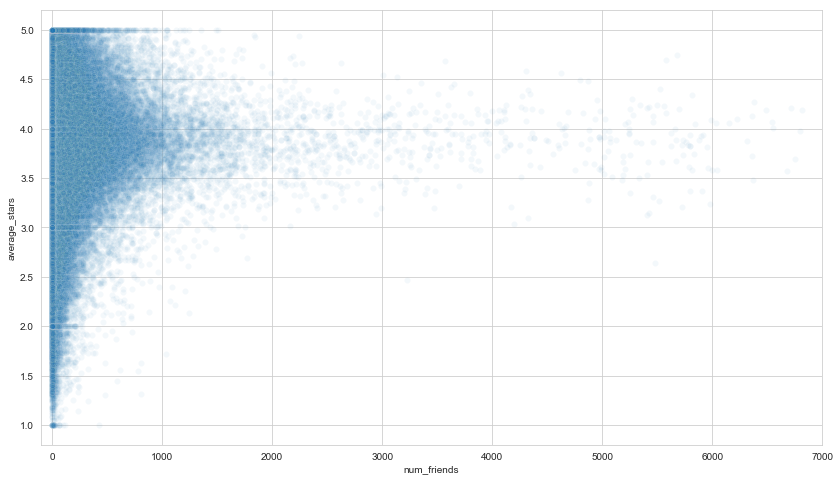

In [120]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.scatterplot(#x=np.log(df_friends.num_friends),
                x='num_friends', 
                y='average_stars', data=df_friends, alpha=0.05)
plt.xlim(-100,7000)

(-100, 4000)

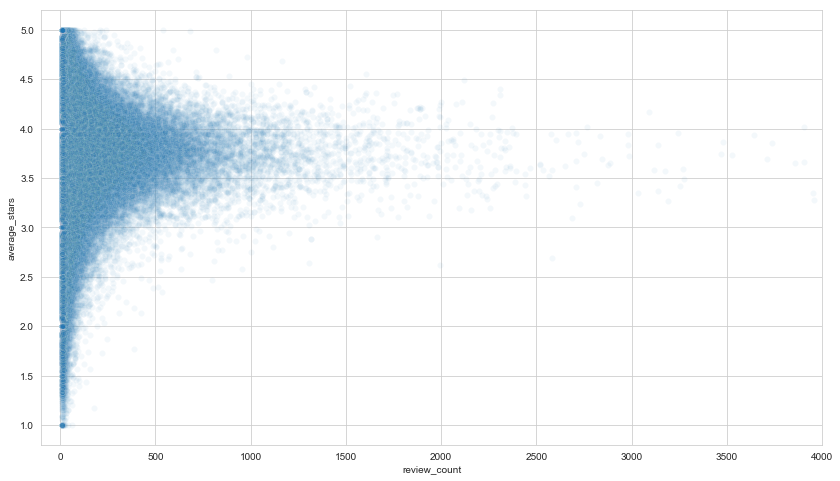

In [121]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.scatterplot(x='review_count', y='average_stars', data=df_friends, alpha=0.05)
plt.xlim(-100, 4000)

(-10, 3000)

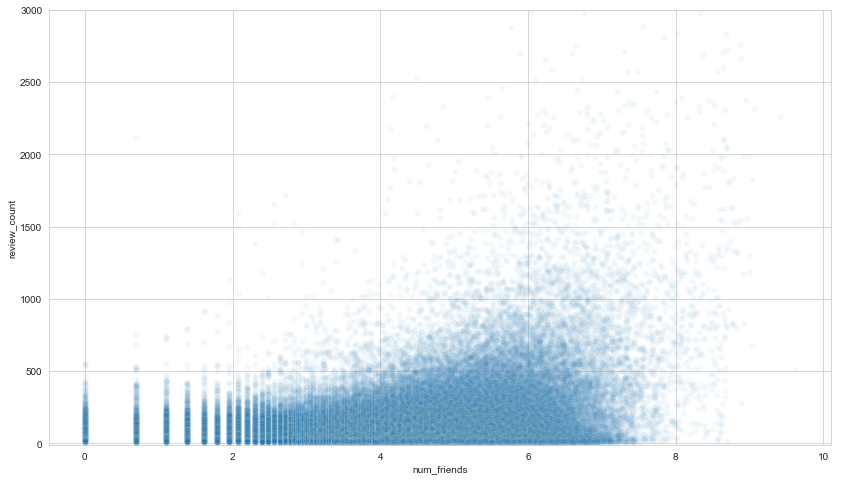

In [122]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.scatterplot(x=np.log(df_friends.num_friends), y='review_count', data=df_friends, alpha=0.05)
plt.ylim(-10,3000)

(-10, 4000)

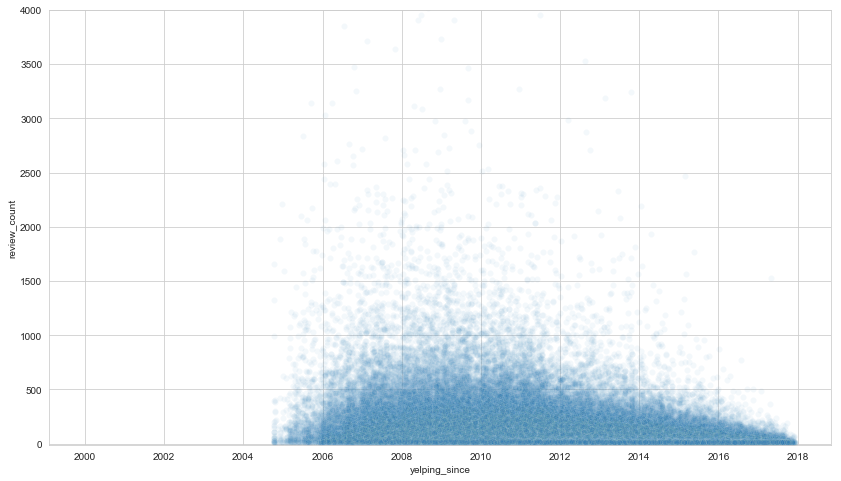

In [123]:
matplotlib.rcParams['figure.figsize'] = (14, 8)
sns.scatterplot(x='yelping_since', y='review_count', data=df_friends, alpha=0.05)
plt.ylim(-10,4000)

#### NetworkX

In [71]:
import networkx as nx

In [72]:
G = nx.Graph()

In [126]:
small = df_friends[df_friends.review_count < 100]

In [129]:
small.describe()

review_count         useful          funny           cool  \
count  301351.000000  301351.000000  301351.000000  301351.000000   
mean       31.192340      20.350040       6.742370       7.363433   
std        21.587937     374.812433     117.733523     364.100538   
min        10.000000       0.000000       0.000000       0.000000   
25%        15.000000       1.000000       0.000000       0.000000   
50%        23.000000       3.000000       1.000000       0.000000   
75%        41.000000      13.000000       3.000000       2.000000   
max        99.000000  179212.000000   29305.000000  186521.000000   

                fans  average_stars  compliment_hot  compliment_more  \
count  301351.000000  301351.000000   301351.000000    301351.000000   
mean        1.419312       3.813021        0.809388         0.271089   
std         4.058425       0.590243       11.185416         1.677743   
min         0.000000       1.000000        0.000000         0.000000   
25%         0.000000       3.470000        0.000000         0.000000   
50%         1.000000       3.870000        0.000000         0.000000   
75%         2.000000       4.220000        0.000000         0.000000   
max       492.000000       5.000000     2570.000000       667.000000   

       compliment_profile  compliment_cute  compliment_list  compliment_note  \
count       301351.000000    301351.000000    301351.000000    301351.000000   
mean             0.073625         0.087569         0.017524         0.944855   
std              0.946208         0.887747         0.348580         5.838075   
min              0.000000         0.000000         0.000000         0.000000   
25%              0.000000         0.000000         0.000000         0.000000   
50%              0.000000         0.000000         0.000000         0.000000   
75%              0.000000         0.000000         0.000000         1.000000   
max            425.000000       169.000000        97.000000      1043.000000   

       compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
count     301351.000000    301351.000000     301351.000000      301351.000000   
mean           1.364250         1.249559          1.249559           0.555797   
std           10.412449        13.992016         13.992016           2.563382   
min            0.000000         0.000000          0.000000           0.000000   
25%            0.000000         0.000000          0.000000           0.000000   
50%            0.000000         0.000000          0.000000           0.000000   
75%            1.000000         1.000000          1.000000           0.000000   
max         2153.000000      2876.000000       2876.000000         416.000000   

       compliment_photos    num_friends           year  
count      301351.000000  301351.000000  301351.000000  
mean            0.329280      55.904809    2011.665921  
std             6.665064     112.811320       2.279908  
min             0.000000       1.000000    2004.000000  
25%             0.000000       4.000000    2010.000000  
50%             0.000000      18.000000    2012.000000  
75%             0.000000      61.000000    2013.000000  
max          1970.000000    6001.000000    2017.000000

In [124]:
small = df_friends[['user_id','friends']]

In [125]:
small.head()

user_id                                            friends
0   JJ-aSuM4pCFPdkfoZ34q0Q  0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...
18  jYnkJR3T8yCERXywoVhWYA  hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...
44  fV8Yr0c5tFQTQ2SRRJHXHw  HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...
74  aw973Pm1nrTbRjP4zY9B9g  Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...
90  pzpbr9mlagHhDRdin8DvPQ  PZbPhdy0_08tHprIJiZ4uw, i4dhajw93ZDmIa89n6-w9w...

In [91]:
small['friends'] = small.friends.apply(lambda x: x.split(","))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
small.head()

user_id                                            friends
0   JJ-aSuM4pCFPdkfoZ34q0Q  [0njfJmB-7n84DlIgUByCNw,  rFn3Xe3RqHxRSxWOU19G...
18  jYnkJR3T8yCERXywoVhWYA  [hkXekeW_Jj6mIy8r8N7r1Q,  dQDpV-VUtwYGqHznuRV-...
44  fV8Yr0c5tFQTQ2SRRJHXHw  [HDb4fBWIAQ-foS8qLJty9w,  x0hBZsmBTYxhjjx0MShz...
74  aw973Pm1nrTbRjP4zY9B9g  [Cit5yho-DqotA0BnXHErTQ,  bm2DqfP4P454FjEtCbZd...
90  pzpbr9mlagHhDRdin8DvPQ  [PZbPhdy0_08tHprIJiZ4uw,  i4dhajw93ZDmIa89n6-w...

In [97]:
small = small.set_index('user_id')

In [98]:
small.head()

friends
user_id                                                                  
JJ-aSuM4pCFPdkfoZ34q0Q  [0njfJmB-7n84DlIgUByCNw,  rFn3Xe3RqHxRSxWOU19G...
jYnkJR3T8yCERXywoVhWYA  [hkXekeW_Jj6mIy8r8N7r1Q,  dQDpV-VUtwYGqHznuRV-...
fV8Yr0c5tFQTQ2SRRJHXHw  [HDb4fBWIAQ-foS8qLJty9w,  x0hBZsmBTYxhjjx0MShz...
aw973Pm1nrTbRjP4zY9B9g  [Cit5yho-DqotA0BnXHErTQ,  bm2DqfP4P454FjEtCbZd...
pzpbr9mlagHhDRdin8DvPQ  [PZbPhdy0_08tHprIJiZ4uw,  i4dhajw93ZDmIa89n6-w...

In [101]:
small_dict = small.to_dict()['friends']

In [102]:
small_dict

{'JJ-aSuM4pCFPdkfoZ34q0Q': ['0njfJmB-7n84DlIgUByCNw',
  ' rFn3Xe3RqHxRSxWOU19Gpg',
  ' HVUAmApa0fCbHHVJ0ALshw',
  ' LBOTb6bJjCdFyDLNswUGmA',
  ' cy3d0moQOsrhWo6VAyA_kA',
  ' XTDeelhFzFX0h_8YELJDIQ',
  ' _erxdUfB8yJA_MCDBAaD_w',
  ' 3wMYVoHy15nxOCLZYYIhqA',
  ' 74C8Mdn3ISlFIwNZQUPEdg',
  ' Vc980a_kTQL9tzfG1ESq_g',
  ' UPld_8xdzvYmIMA4YxtG0A',
  ' ggppqaSt-4E-Y2XUVv6mMw',
  ' vILp0ctTM3fX0ucJeBw9Hg',
  ' Gl46kwumd4_f102dxgswDw',
  ' i9CDu8j-qcUfZYl67WBwiw',
  ' 23lcgZUt6dvtMqV_AZe9KQ',
  ' zacONW61-GjaCF9h5_icgA',
  ' BclKLmGPYlMEVr3OZ_Uuzw',
  ' ol00uKESTC5PR_fETT27AA',
  ' o7e8zecvSlPNTrPi1ZQLzg',
  ' 00JBHX0npVAC-itaFOUhpQ',
  ' im3w0wt-ZeE-lDa1zSdyMg',
  ' J_hT3mbtiwHIEWjTBSJnzQ',
  ' _54jmZK9vr9CN-SUSjFbMg',
  ' 65w6GtrNNlZDowVDAYGZFQ',
  ' WJeipqBVdQmVhnYrXlLb7A',
  ' vAhyONgVtU-oIaSHRJW0IA',
  ' Soa5S7dQsSjlG3lbTVGb2A',
  ' xtVcWcIKVORcBKhmdbrFiA',
  ' 7CghpxENlXnjTGOyNtRDsg',
  ' jI5mX0tNR79J_qoFKZMPdA',
  ' MFtiq9lbm95WVg501wNsww',
  ' SCICexHST-LMCowvH9h7jQ',
  ' SD2VfVLfSkz8m1

In [103]:
G = nx.from_dict_of_lists(small_dict)

In [ ]:
nx.write_gpickle(G, "friends.gpickle")

# Simple Recommender (Phoenix Data)

In [239]:
phx = df[df.city == 'Phoenix']

In [249]:
phx.head(4)

user_id             business_id  rev_stars       date  \
68146  TxHx1fb8O_MsfQB_ODdTQg  frCxZS7lPhEnQRJ3UY6m7A          4 2012-03-18   
68147  WMMI5Q4Rmm1Rqdu0jOvyhQ  jHIJ0hfy5USIWvcdynzrFQ          3 2017-02-19   
68148  v1SAbI2oYhG9e47WWtYoew  82I9SSilxh3zL8F1UQ45Xw          5 2016-11-06   
68149  sSxVSRgH1nXTijHdeApynw  prdA1r8XP03oD-PYvZJ5AA          1 2016-07-05   

                                                    text  useful  funny  cool  \
68146  So good! So good. A must try taco shop if you ...       1      0     1   
68147  I know I've said this before, but just to reit...       3      4     2   
68148  Ahwatukee's Best for the Pups!!\n\nWe have a 5...       0      0     0   
68149  Thought I'd grab a bite while waiting for my f...       0      0     0   

                       bus_id                          name neighborhood  \
68146  frCxZS7lPhEnQRJ3UY6m7A                "La Santisima"          NaN   
68147  jHIJ0hfy5USIWvcdynzrFQ  "Grand Avenue Pizza Company"          NaN   
68148  82I9SSilxh3zL8F1UQ45Xw        "Uncle Bear's Brewery"          NaN   
68149  prdA1r8XP03oD-PYvZJ5AA      "Sir Veza's Taco Garage"          NaN   

                        address     city state postal_code   latitude  \
68146          "1919 N 16th St"  Phoenix    AZ       85006  33.469201   
68147          "1031 Grand Ave"  Phoenix    AZ       85007  33.454960   
68148  "4921 E Ray Rd, Ste 103"  Phoenix    AZ       85044  33.317171   
68149  "3400 E Sky Harbor Blvd"  Phoenix    AZ       85034  33.434044   

        longitude  bus_stars  review_count  is_open  \
68146 -112.047393        4.0          1694        1   
68147 -112.087116        3.5           139        1   
68148 -111.976508        3.5           292        1   
68149 -111.994364        3.0           196        1   

                                              categories  
68146  Vegetarian;Nightlife;Mexican;Bars;Vegan;Restau...  
68147                                  Pizza;Restaurants  
68148  Restaurants;Nightlife;American (Traditional);B...  
68149                                Restaurants;Mexican

In [262]:
#simple recommender using collaborative mean (collaborative mean should be very close to Yelp Rating)
def collab_mean(user_id, business_id):
    #make sure not to consider input user
    user_condition = phx.user_id != user_id
    #index into all ratings for the business_id
    rest_condition = phx.business_id == business_id
    
    ratings_by_others = phx.loc[user_condition & rest_condition]
    if ratings_by_others.empty:
        return 3.0
    else: 
        return ratings_by_others.rev_stars.mean()
    
    
#test on single user / restaurant combination   
user = 'sSxVSRgH1nXTijHdeApynw'
rest = 'prdA1r8XP03oD-PYvZJ5AA'     
print(f"Predicted Rating: {collab_mean(user, rest)}")
print(f"User Actual Rating: {(phx[(phx.user_id == user) & (phx.business_id == rest)]).rev_stars.iloc[0]}")
print(f"Yelp Rating: {phx[phx.business_id == rest].bus_stars.iloc[0]}")


Predicted Rating: 2.917525773195876
User Actual Rating: 1
Yelp Rating: 3.0


In [261]:
#simple recommender using content mean (content mean should be same as user's average rating)
def content_mean(user_id, business_id):
    user_condition = phx.user_id == user_id
    return phx.loc[user_condition, 'rev_stars'].mean()


#test on single user / restaurant combination
user = 'sSxVSRgH1nXTijHdeApynw'
rest = 'prdA1r8XP03oD-PYvZJ5AA' 
print(f"Predicted Rating: {content_mean(user, rest)}")
print(f"User Actual Rating: {(phx[(phx.user_id == user) & (phx.business_id == rest)]).rev_stars.iloc[0]}")
print(f"Yelp Rating: {phx[phx.business_id == rest].bus_stars.iloc[0]}")


Predicted Rating: 2.5
User Actual Rating: 1
Yelp Rating: 3.0


# NLP

### NLP - Using NLTK

In [225]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

#### Tokenize words

In [33]:
#picking a single review to focus on
review = gordon.loc[2996564].text

In [38]:
sentences = sent_tokenize(review)

In [41]:
#Let's see the first 5 sentences
sentences[0:4]

["Being an avid burger lover who is always in search of the ultimate burger, Gordon Ramsey's BurGR has been on my bookmark for the longest time.",
 'We were excited that we were eventually there!',
 'This place must be popular.',
 'At around 2:30PM on a Sunday afternoon during the slower season of October, we were still quoted a 20 - 30 minute wait.']

In [42]:
words = word_tokenize(review)

In [126]:
words[0:5]

['Being', 'an', 'avid', 'burger', 'lover']

#### Lowercase

In [45]:
#let's convert to lowercase
lower_tokens = [t.lower() for t in words]

In [46]:
#count the words
from collections import Counter

In [47]:
#simple bag of words
bow_simple = Counter(lower_tokens)

In [142]:
#let's see the top ten most common words from this review
print(bow_simple.most_common(10))

[('.', 23), ('the', 21), ('were', 12), ('and', 11), (',', 9), ('it', 9), ('burger', 8), ('a', 8), ("'s", 7), ('with', 7)]


#### Removing stop words and using alphabetical characters only

In [226]:
english_stops = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [52]:
#OK it's obvious that in a long paragraph the most common tokens are 'the', 'were', punctuation and 'burger', 
#which probably has something to do with the fact that this place serves burgers
#let's start with the basics and only retain alphabetical words
from nltk.stem import WordNetLemmatizer
alpha_only = [t for t in lower_tokens if t.isalpha()]
#and let's remove all the stop words
no_stops = [t for t in alpha_only if t not in english_stops]

In [128]:
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Let's print the 10 most common tokens again
print(bow.most_common(5))

[('burger', 8), ('really', 5), ('u', 4), ('probably', 4), ('bacon', 4)]


### Gensim library

In [227]:
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

In [58]:
dictionary = Dictionary([lemmatized])

In [59]:
burger_id = dictionary.token2id.get('burger')

In [60]:
print(dictionary.get(burger_id))

burger


In [87]:
#Creating an MmCorpus
corpus = [dictionary.doc2bow(lem) for lem in [lemmatized]]

In [93]:
doc = corpus[0]

In [94]:
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [95]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


In [106]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [107]:
# Sort the doc for frequency: bow_doc
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [108]:
# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


#### Gensim TF-IDF

In [228]:
from gensim.utils import simple_preprocess
from gensim.models.tfidfmodel import TfidfModel

In [229]:
def custom_preprocess(input_string):
    '''
    This function will take a string as an input (in this case an individual review)
    and return a pre-processed list of tokens based on below processing methods
    '''
    doc_words = word_tokenize(input_string) #tokenize words
    lower_tokens = [t.lower() for t in doc_words] #let's convert to lowercase 
    alpha_only = [t for t in lower_tokens if t.isalpha()] #keep only alphabetical characters
    no_stops = [t for t in alpha_only if t not in english_stops] #and let's remove all the stop words
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops] # Lemmatize all tokens into a new list: lemmatized
    
    return lemmatized

In [330]:
#picking only three reviews for this example
documents = list([gordon.loc[2996564].text, 
                  gordon.loc[552735].text, 
                  gordon.loc[1127244].text])

# Create the Dictionary and Corpus
mydict = Dictionary([custom_preprocess(review) for review in documents])
corpus = [mydict.doc2bow(custom_preprocess(review)) for review in documents]

# Create the TF-IDF model
tfidf = TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
tfidf_weights = []
for doc in tfidf[corpus]:

    weight=[[mydict[id], np.around(freq, decimals=2)] for id, freq in doc]
    
    tfidf_weights.append(weight)

In [260]:
from operator import itemgetter

In [268]:
print('Top 10 freq words in first review: ')
sorted(tfidf_weights[0], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in first review: 


[['probably', 0.32],
 ['ultimate', 0.24],
 ['absolutely', 0.16],
 ['although', 0.16],
 ['breast', 0.16],
 ['close', 0.16],
 ['egg', 0.16],
 ['fry', 0.16],
 ['love', 0.16],
 ['perfectly', 0.16]]

In [269]:
print('Top 10 freq words in second review: ')
sorted(tfidf_weights[1], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in second review: 


[['waitress', 0.31],
 ['glad', 0.18],
 ['roasted', 0.18],
 ['sou', 0.18],
 ['ticket', 0.18],
 ['told', 0.18],
 ['vega', 0.18],
 ['chef', 0.15],
 ['eat', 0.13],
 ['looked', 0.13]]

In [270]:
print('Top 10 freq words in third review: ')
sorted(tfidf_weights[2], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in third review: 


[['http', 0.34],
 ['could', 0.2],
 ['ramsay', 0.2],
 ['top', 0.2],
 ['bite', 0.14],
 ['booth', 0.14],
 ['brûlée', 0.14],
 ['chair', 0.14],
 ['creme', 0.14],
 ['fan', 0.14]]

#### Gensim Bigrams and Trigrams

In [232]:
from gensim import models

In [243]:
words = [word_tokenize(review) for review in documents]

In [244]:
#build the bigrams model
bigrams = models.phrases.Phrases(words, min_count=3, threshold=10)

#### LDA Topics

In [271]:
from gensim.models import LdaModel, LdaMulticore

In [364]:
lda_model = LdaMulticore(corpus=corpus,
                        id2word=mydict,
                        random_state=42,
                        num_topics=5,
                        passes=10,
                        chunksize=10,
                        batch=False,
                        alpha='asymmetric',
                        decay=0.5,
                        offset=64,
                        eta=None,
                        eval_every=0,
                        iterations=100,
                        gamma_threshold=0.001,
                        per_word_topics=True)

In [365]:
lda_model.print_topic(-1)

'0.022*"burger" + 0.012*"would" + 0.010*"chef" + 0.009*"like" + 0.008*"waitress" + 0.008*"really" + 0.007*"also" + 0.007*"gordon" + 0.006*"one" + 0.006*"good"'

##### This was a relatively small sample of reviews. Let's try this on the entire set of 5 star reviews for this restaurant

In [366]:
#Let's first look at the same restaurant but include all 5 star reviews
all_documents = list(gordon.text)

In [367]:
# Create the Dictionary and Corpus
all_mydict = Dictionary([custom_preprocess(review) for review in all_documents])
all_corpus = [all_mydict.doc2bow(custom_preprocess(review)) for review in all_documents]

In [380]:
all_lda_model = LdaMulticore(corpus=all_corpus,
                            id2word=all_mydict,
                            random_state=42,
                            num_topics=10,
                            passes=100,
                            chunksize=10,
                            batch=False,
                            alpha='asymmetric',
                            decay=0.5,
                            offset=64,
                            eta=None,
                            eval_every=0,
                            iterations=100,
                            gamma_threshold=0.001,
                            per_word_topics=True)

In [376]:
for c in lda_model[corpus[0:5]]:
    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
    print("Word id, Topics      : ", c[1][:3])  # [(Word id, [Topics])]
    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
    print("Word, Topics         : ", [(all_mydict[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
    print("Phi Values (word)    : ", [(all_mydict[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    print("------------------------------------------------------\n")

Document Topics      :  [(4, 0.9953662)]
Word id, Topics      :  [(0, [4]), (1, [4]), (2, [4])]
Phi Values (word id) :  [(0, [(4, 1.9997014)]), (1, [(4, 0.99975264)])]
Word, Topics         :  [('best', [4]), ('burger', [4])]
Phi Values (word)    :  [('best', [(4, 1.9997014)]), ('burger', [(4, 0.99975264)])]
------------------------------------------------------

Document Topics      :  [(4, 0.9978122)]
Word id, Topics      :  [(10, [4]), (11, [4]), (12, [4])]
Phi Values (word id) :  [(10, [(4, 1.9998614)]), (11, [(4, 0.9999573)])]
Word, Topics         :  [('apologized', [4]), ('bad', [4])]
Phi Values (word)    :  [('apologized', [(4, 1.9998614)]), ('bad', [(4, 0.9999573)])]
------------------------------------------------------

Document Topics      :  [(2, 0.99630594)]
Word id, Topics      :  [(10, [2]), (11, [2]), (14, [2])]
Phi Values (word id) :  [(10, [(2, 1.9998587)]), (11, [(2, 0.9998618)])]
Word, Topics         :  [('apologized', [2]), ('bad', [2])]
Phi Values (word)    :  [('a

In [317]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
pyLDAvis.enable_notebook()

In [381]:
vis = pyLDAvis.gensim.prepare(all_lda_model, all_corpus, all_mydict)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.368841 -0.074429       1        1  88.443169
9     -0.196620  0.091760       2        1   5.023203
0      0.054388  0.327573       3        1   3.470896
2      0.109042 -0.096083       4        1   1.286897
3      0.074120 -0.047174       5        1   0.495204
5      0.066499 -0.039777       6        1   0.333349
4      0.068287 -0.042339       7        1   0.300597
7      0.068883 -0.043015       8        1   0.248257
6      0.062480 -0.038502       9        1   0.212498
8      0.061762 -0.038015      10        1   0.185934, topic_info=     Category         Freq          Term        Total  loglift  logprob
150   Default   421.000000         table   421.000000  30.0000  30.0000
31    Default   559.000000          line   559.000000  29.0000  29.0000
285   Default   256.000000       pudding   256.000000  28.0000  28.0000
51    Default   557.000000             u   557.000000  27.0000  27.0000
488   Default   426.000000    experience   426.000000  26.0000  26.0000
171   Default   156.000000            la   156.000000  25.0000  25.0000
121   Default   434.000000          menu   434.000000  24.0000  24.0000
472   Default   214.000000          chef   214.000000  23.0000  23.0000
24    Default   689.000000           get   689.000000  22.0000  22.0000
53    Default   939.000000          wait   939.000000  21.0000  21.0000
257   Default   150.000000       dessert   150.000000  20.0000  20.0000
190   Default   184.000000           bar   184.000000  19.0000  19.0000
245   Default   259.000000        around   259.000000  18.0000  18.0000
32    Default   302.000000          make   302.000000  17.0000  17.0000
1     Default  5425.000000        burger  5425.000000  16.0000  16.0000
281   Default   171.000000          oreo   171.000000  15.0000  15.0000
717   Default   240.000000        people   240.000000  14.0000  14.0000
141   Default   232.000000        seated   232.000000  13.0000  13.0000
287   Default   148.000000         ready   148.000000  12.0000  12.0000
436   Default   250.000000           two   250.000000  11.0000  11.0000
331   Default   239.000000         staff   239.000000  10.0000  10.0000
669   Default   115.000000         creme   115.000000   9.0000   9.0000
295   Default   176.000000          take   176.000000   8.0000   8.0000
35    Default   173.000000          name   173.000000   7.0000   7.0000
298   Default   123.000000          text   123.000000   6.0000   6.0000
...       ...          ...           ...          ...      ...      ...
2370  Topic10     1.423919          slaw     2.041434   5.9273  -5.0894
4688  Topic10     1.361132         outer     1.978822   5.9133  -5.1345
697   Topic10     0.815744  enthusiastic     1.433226   5.7240  -5.6465
2366  Topic10     0.715832        forest     1.333436   5.6655  -5.7771
3847  Topic10     0.559083      mmmburgr     1.176479   5.5435  -6.0243
705   Topic10     0.468436         scene     1.085859   5.4468  -6.2012
4211  Topic10     0.412886         salsa     1.030341   5.3731  -6.3274
3269  Topic10     0.391104         witty     1.008677   5.3401  -6.3816
3792  Topic10     0.217625   inexpensive     0.835101   4.9428  -6.9678
2974  Topic10     0.161167         faint     0.778579   4.7125  -7.2681
2972  Topic10     0.134646      daunting     0.752072   4.5673  -7.4479
3844  Topic10     0.089780          feta     0.707275   4.2235  -7.8532
3849  Topic10     0.089780        settle     0.707275   4.2235  -7.8532
6578  Topic10     0.068693     hungarian     0.698440   3.9683  -8.1209
6915  Topic10     0.053752         neeed     0.726763   3.6833  -8.3662
6917  Topic10     0.053752      scotland     0.726763   3.6833  -8.3662
6916  Topic10     0.053752     resturabt     0.726763   3.6833  -8.3662
6579  Topic10     0.041884          tyre     0.665434   3.5220  -8.6156
6577  Topic10     0.041884         breed     0.665434   3.5220  -8.61

In [ ]:
\

#### Sentiment Analysis using Afinn

In [321]:
#Let's take some positive data first
from afinn import Afinn

In [341]:
af = Afinn()
sentiment_scores = [af.score(review) for review in documents]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [325]:
sentiment_scores

[59.0, 66.0, 60.0]

In [326]:
sentiment_category

['positive', 'positive', 'positive']

In [345]:
gordon_negative = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 1)]

In [346]:
documents_negative = list(gordon_negative.text[0:3])

In [347]:
sentiment_scores = [af.score(review) for review in documents_negative]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [348]:
sentiment_scores

[12.0, 4.0, -9.0]

In [349]:
sentiment_category

['positive', 'neutral', 'negative']

In [351]:
documents_negative[0]

"Being vegan, me and my wife ordered Earth Burger (veggie) and to be honest this was the worst burger we have ever eaten. $15 for such a crap. On top of that they won't even serve you any sides. Serving size is also small. I am not going to this place again ever !\n\nIf you want some really awesome burger, try Veggie Burger in Grand Luxe Cafe in Venetian or Palazzo. You will love it."

#### Sentiment Analysis using TextBlob

In [352]:
from textblob import TextBlob

In [357]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [358]:
sentiment_scores_tb

[0.308, 0.22, 0.282]

In [359]:
sentiment_category_tb

['positive', 'positive', 'positive']

In [361]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents_negative]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [362]:
sentiment_scores_tb

[0.11, 0.022, -0.22]

In [363]:
sentiment_category_tb

['positive', 'positive', 'negative']

### SpaCy

In [81]:
#EDA Ideas

####NOTE NAME OF RESTAURANT NAMES CAN HAVE MULTIPLE BUSINESS IDs!



#breakdown of restaurants by type for the area as a function of reviews, and then review histograms 
#per type of restaurant
#Need to figure out how to break out restaurant type from the categories column

#might have to get rid of foreign language reviews

#focus on one or few large cities. Need to figure out count of users who review the same restaurants.
#This will result in a more are accurate recommendation engine. Cities such as Vegas may not be a good choice
#since it is a very popular tourist destination and getting multiple users to review same restaurants may not 
#be easy. We can check into that

#get rid of low word count reviews? and high count reviews?

#look at reviews ratings over time 

In [37]:
city_list = list(df.groupby(['city']).size().sort_values(ascending=False).keys()[0:10])

City Name: Las Vegas
Reviews per user: 2.6819534791144566
Reviews per business: 174.61555075593952
Number of Users: 331593
Number of Businesses: 5093
Number of Reviews: 889317


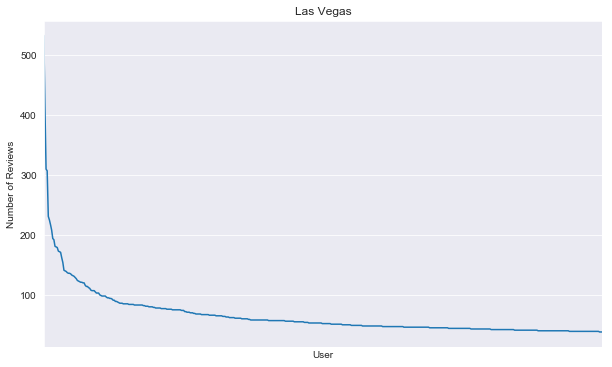

City Name: Phoenix
Reviews per user: 2.6162328812657893
Reviews per business: 101.00320821302535
Number of Users: 120336
Number of Businesses: 3117
Number of Reviews: 314827


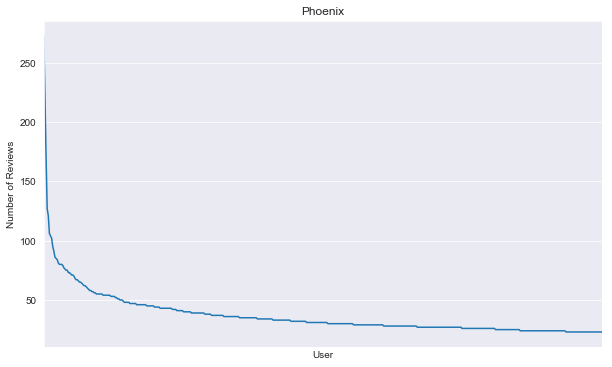

City Name: Toronto
Reviews per user: 4.090067164490426
Reviews per business: 43.74966532797858
Number of Users: 71913
Number of Businesses: 6723
Number of Reviews: 294129


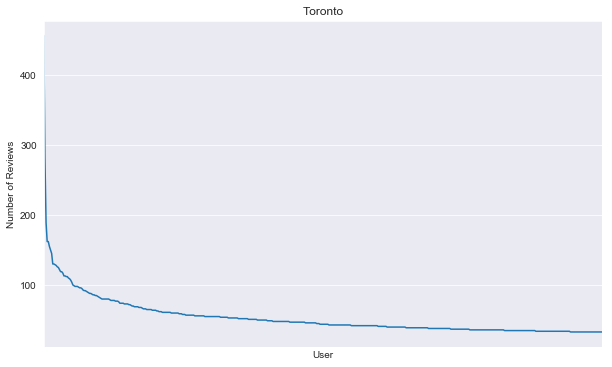

City Name: Scottsdale
Reviews per user: 2.2771967215271474
Reviews per business: 130.93192133131618
Number of Users: 76011
Number of Businesses: 1322
Number of Reviews: 173092


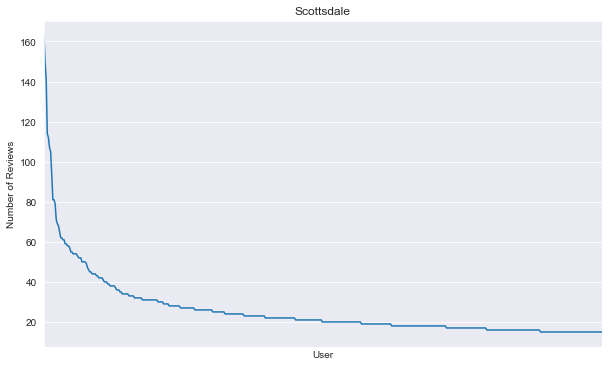

City Name: Charlotte
Reviews per user: 2.9634847154601327
Reviews per business: 70.58840304182509
Number of Users: 50116
Number of Businesses: 2104
Number of Reviews: 148518


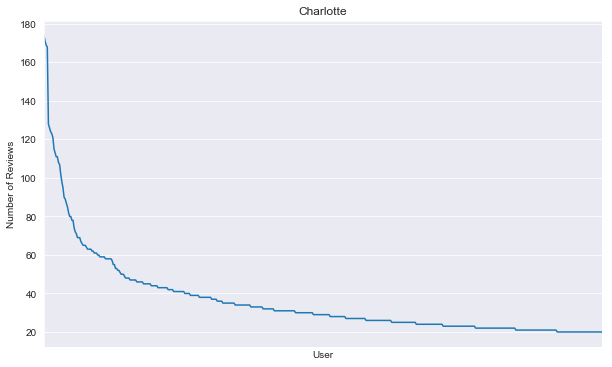

City Name: Pittsburgh
Reviews per user: 2.9504552242400885
Reviews per business: 60.31363860167405
Number of Users: 41518
Number of Businesses: 2031
Number of Reviews: 122497


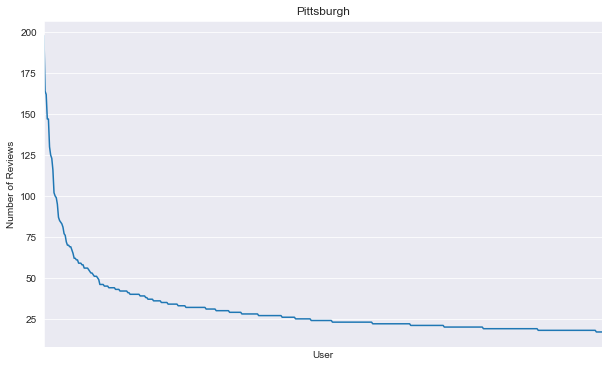

City Name: Montréal
Reviews per user: 2.8016217870257036
Reviews per business: 28.566926677067084
Number of Users: 32680
Number of Businesses: 3205
Number of Reviews: 91557


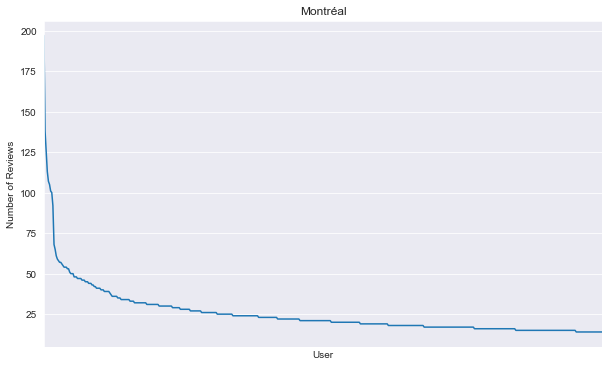

City Name: Tempe
Reviews per user: 1.9679399267069853
Reviews per business: 104.95443645083932
Number of Users: 44479
Number of Businesses: 834
Number of Reviews: 87532


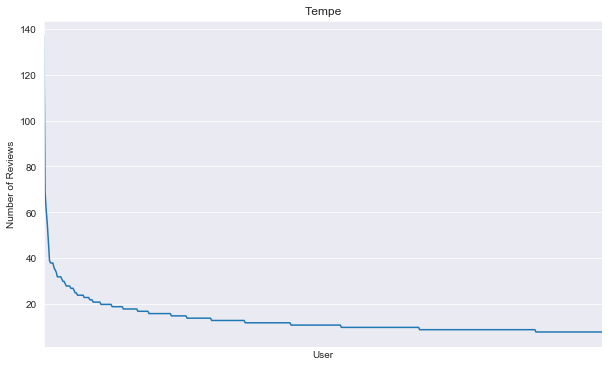

City Name: Henderson
Reviews per user: 2.0068619073513037
Reviews per business: 112.64970930232558
Number of Users: 38619
Number of Businesses: 688
Number of Reviews: 77503


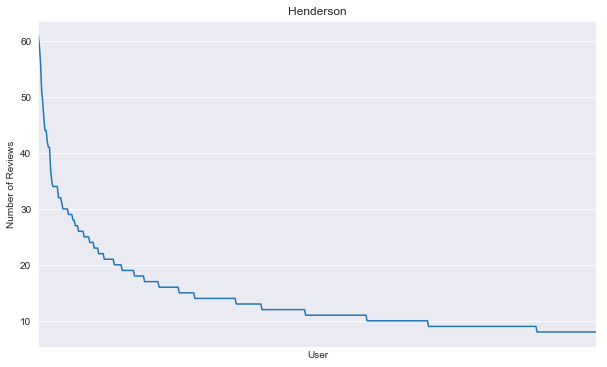

City Name: Chandler
Reviews per user: 2.0756241517533063
Reviews per business: 91.8463687150838
Number of Users: 31683
Number of Businesses: 716
Number of Reviews: 65762


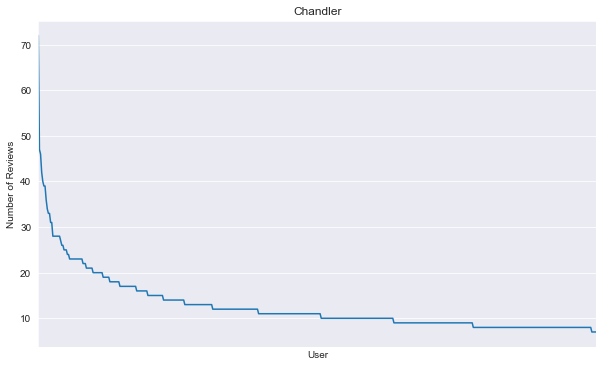

In [54]:
for i in range(0,len(city_list)):
    dfcity = df[df.city == city_list[i]]
    dfcity.groupby(['user_id','rev_stars']).size().sort_values(ascending=False)[0:500].plot()
    print(f'City Name: {city_list[i]}')
    print(f'Reviews per user: {dfcity.rev_stars.count() / len(dfcity.user_id.unique())}')
    print(f'Reviews per business: {dfcity.rev_stars.count() / len(dfcity.business_id.unique())}')
    print(f'Number of Users: {len(dfcity.user_id.unique())}')
    print(f'Number of Businesses: {len(dfcity.business_id.unique())}')
    print(f'Number of Reviews: {dfcity.rev_stars.count()}')
    plt.title(city_list[i])
    plt.xlabel('User')
    plt.ylabel('Number of Reviews')
    plt.xticks([])
    plt.show()
    

## Using NetworkX, find the restaurants that have the most number of shared users.

In [14]:
import networkx as nx

In [15]:
G = nx.Graph()

In [16]:
#adding the nodes for users and businesses
G.add_nodes_from(pit['user_id'], bipartite='user_id')
G.add_nodes_from(pit['business_id'], bipartite='business_id')
#adding edges between the users and businesses
G.add_edges_from(zip(pit['user_id'], pit['business_id']))

#Gather nodes from all partitions
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'user_id']
rest_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'business_id']

In [17]:
#create the connectivity matrix
mat = nx.bipartite.biadjacency_matrix(G,
                                     row_order=cust_nodes,
                                     column_order=rest_nodes)

In [18]:
from nxviz import CircosPlot

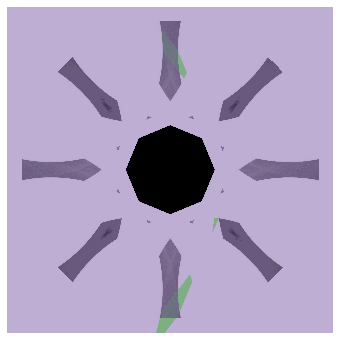

In [20]:
c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')
c.draw()
plt.show()

In [22]:
plt.savefig('phoenix_network.png')

<Figure size 720x432 with 0 Axes>

In [21]:
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)

In [26]:
adjacency_matrix.sum()

244994

In [18]:
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")

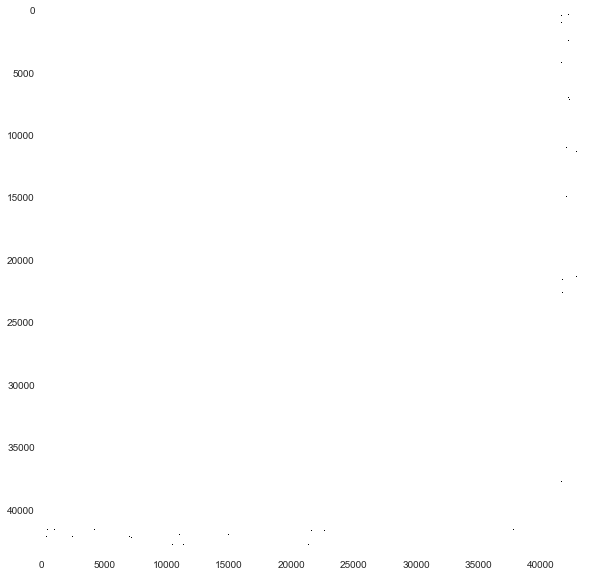

In [19]:
draw_adjacency_matrix(G)

In [120]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
con_matrix = mat @ mat.T 

In [121]:
#set the diagonal to zero and convert to coordinate matrix format
con_matrix.setdiag(0)
business_coo = con_matrix.tocoo()

In [ ]:
#find the businesses who shared the most number of users 

In [47]:
count = list(con_matrix.sum(axis=0))

In [50]:
print(count[0][0])

[[  423  6273 11523 ...   103    50     5]]


In [54]:
#use degree centrality to figure out the customer importance metric
#the higher values represent more connections to restaurants
nx.bipartite.degree_centrality(G, cust_nodes)

{'hjx3BT4QXbR8H5js251_Ow': 0.00019634792852935403,
 'KUvyfWBnBFQkS8CFnGG4xA': 0.00019634792852935403,
 'w53pb8dfRcoV6t3RSw1QAQ': 0.00039269585705870805,
 'pvmzmPs-uEWjObcJuUaWcw': 0.00019634792852935403,
 'eLVIfBOPwEw5wpcHMfW3MQ': 0.0005890437855880621,
 'd8yfvMid_qgJ2fAO8W9UFw': 0.00019634792852935403,
 'ZMqKGYb_oJpDz3HBT-nh-g': 0.00039269585705870805,
 'YOImIB91eptt0y2WVjiHqQ': 0.0007853917141174161,
 'PPT8xr_ryVlQupjbPb9Ldg': 0.00019634792852935403,
 'Z1OJOcwsWppWFOKWFusa4A': 0.00019634792852935403,
 'A1N9-N9wBnjX44Za-9AJQg': 0.0005890437855880621,
 '9vtFHK7QcLDICLLzGV90WQ': 0.00019634792852935403,
 'WrN3_iH0mrt0t1E-dETwEw': 0.0005890437855880621,
 'DhMvxB9apRacIrBrqMfc9Q': 0.00019634792852935403,
 'wM6ys83Ec1ccdkeWVI0hHQ': 0.0013744354997054782,
 'juNeYhO3yGQnTzZJDxrL3Q': 0.00019634792852935403,
 '1oSb1_MP9RR77F6Fijfftg': 0.00019634792852935403,
 'oEwXlQ0_W3AlE9vKm2ZMRA': 0.00019634792852935403,
 'r_9uZ0eE3A2mPEtn1tzKig': 0.00019634792852935403,
 'kf3SH4T-cDIvWnMQu3q_ng': 0.0001963

In [12]:
test = pd.DataFrame(columns=['users','restaurants'])

In [36]:
test.loc[5] = ['user3', 'rest3']

In [37]:
test.groupby(['restaurants', 'users']).size().unstack('restaurants')

restaurants  rest1  rest2  rest3
users                           
user1          1.0    1.0    NaN
user2          1.0    1.0    NaN
user3          1.0    NaN    1.0

In [38]:
test.head(20)

users restaurants
0  user1       rest1
1  user1       rest2
2  user2       rest1
3  user2       rest2
4  user3       rest1
5  user3       rest3

In [26]:
U = nx.Graph()
U.add_nodes_from(test['users'], bipartite='users')
U.add_nodes_from(test['restaurants'], bipartite='restaurants')
U.add_edges_from(zip(test['users'],test['restaurants']))
#Gather nodes from all partitions
testC_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'users']
testR_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'restaurants']
test_mat = nx.bipartite.biadjacency_matrix(U,
                                     row_order=testC_nodes,
                                     column_order=testR_nodes)

In [31]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
test_con_matrix =  test_mat.T @ test_mat

In [32]:
test_con_matrix.setdiag(0)
test_business_coo = test_con_matrix.tocoo()

In [33]:
count = list(test_con_matrix.sum(axis=0))

In [34]:
count

[matrix([[2, 2]])]